In [1]:
# !pip install opencv-python


In [2]:
# !pip install patchify


In [2]:
# !pip install segmentation-models




In [5]:

import os
import cv2
import numpy as np
import glob

import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify
#import tifffile as tiff
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import segmentation_models as sm
print(sm.__file__)

from tensorflow.keras.metrics import MeanIoU
import random

Segmentation Models: using `keras` framework.
C:\Users\abc\anaconda3\Lib\site-packages\segmentation_models\__init__.py


<!-- !pip install --upgrade segmentation-models efficientnet -->


<!-- !pip install efficientnet -->



In [ ]:
# !pip install --upgrade keras


In [ ]:
# !pip install keras==2.3.1


In [ ]:
# !pip install --upgrade efficientnet
# !pip install --upgrade segmentation-models


In [ ]:
# !pip install --upgrade keras segmentation-models efficientnet



In [ ]:

# !pip install --upgrade efficientnet segmentation-models

Labels are:  [0 1 2 3 4]  and the counts are:  [23401744  1167023 14924792 40573354  2735233]


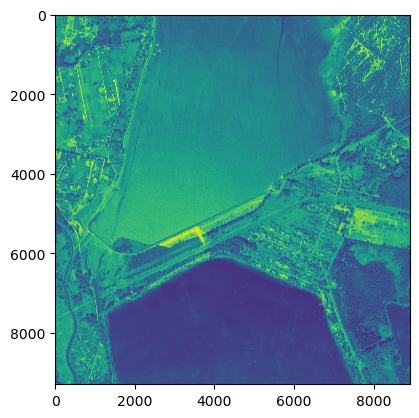

In [4]:
#Quick understanding of the dataset
temp_img = cv2.imread("C:\\Users\\abc\\Downloads\\python\\landcover for project\\images\\M-34-51-C-d-4-1.tif") #3 channels / spectral bands
plt.imshow(temp_img[:,:,2]) #View each channel...
temp_mask = cv2.imread("C:\\Users\\abc\\Downloads\\python\\landcover for project\\masks\\M-34-51-C-d-4-1.tif") #3 channels but all same. 
labels, count = np.unique(temp_mask[:,:,0], return_counts=True) #Check for each channel. All chanels are identical
print("Labels are: ", labels, " and the counts are: ", count)

#Now, crop each large image into patches of 256x256. Save them into a directory 
#so we can use data augmentation and read directly from the drive. 
root_directory = 'C:\\Users\\abc\\Downloads\\python\\landcover for project\\'

patch_size = 256



In [5]:
img_dir=root_directory+"images\\"
for path, subdirs, files in os.walk(img_dir):
      print(path)

C:\Users\abc\Downloads\python\landcover for project\images\


In [14]:
# print("Now patchifying image:", path+"/"+image_name)

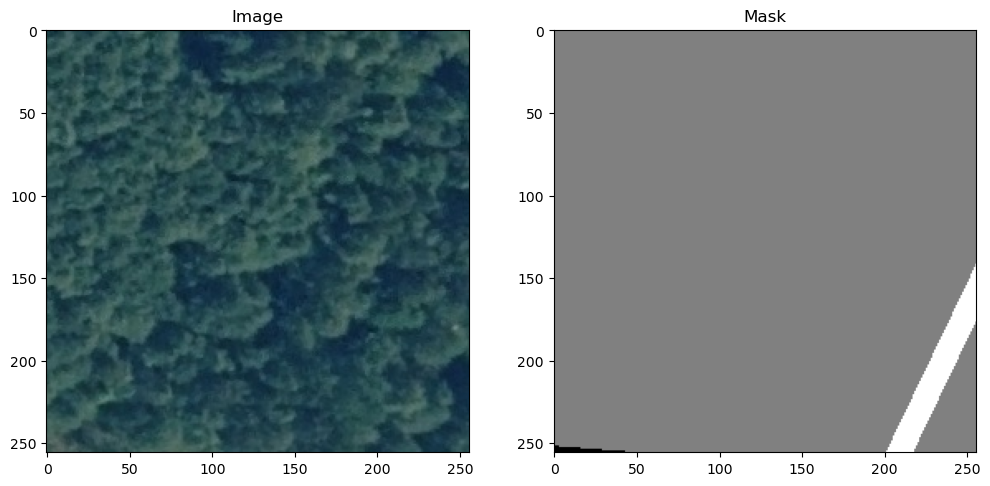

In [13]:


train_img_dir = r"C:\Users\abc\Downloads\python\landcover for project\patches\images"
train_mask_dir = r"C:\Users\abc\Downloads\python\landcover for project\patches\masks"

img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

num_images = len(os.listdir(train_img_dir))

img_num = random.randint(0, num_images-1)

img_for_plot = cv2.imread(os.path.join(train_img_dir, img_list[img_num]), 1)
img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)

mask_for_plot = cv2.imread(os.path.join(train_mask_dir, msk_list[img_num]), 0)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot)
plt.title('Image')
plt.subplot(122)
plt.imshow(mask_for_plot, cmap='gray')
plt.title('Mask')
plt.show()



In [19]:
# Now, let us copy images and masks with real information to a new folder.
# real information = if mask has decent amount of labels other than 0. 

useless=0  #Useless image counter
for img in range(len(img_list)):   #Using t1_list as all lists are of same size
    img_name=img_list[img]
    mask_name = msk_list[img]
    print("Now preparing image and masks number: ", img)
        
      
    temp_image=cv2.imread(train_img_dir+img_list[img], 1)
   
    temp_mask=cv2.imread(train_mask_dir+msk_list[img], 0)
    #temp_mask=temp_mask.astype(np.uint8)
    
    val, counts = np.unique(temp_mask, return_counts=True)
    
    if (1 - (counts[0]/counts.sum())) > 0.05:  #At least 5% useful area with labels that are not 0
        print("Save Me")
        cv2.imwrite('C:\\Users\\abc\\Downloads\\python\\landcover for project\\patches\\images_with_useful_info\\images\\'+img_name, temp_image)
        cv2.imwrite('C:\\Users\\abc\\Downloads\\python\\landcover for project\\patches\\images_with_useful_info\\masks\\'+mask_name, temp_mask)
      
    else:
        print("I am useless")   
        useless +=1

print("Total useful images are: ", len(img_list)-useless)  #20,075
print("Total useless images are: ", useless) #21,571







# useless = 0  # Useless image counter
# useful = 0
# for img in range(len(img_list)):
#     img_name = img_list[img]
#     mask_name = msk_list[img]
#     print("Now preparing image and masks number: ", img)
   


#     temp_image = cv2.imread(train_img_dir + img_name, 1)
#     temp_mask = cv2.imread(train_mask_dir + mask_name, 0)
    
#     # Debugging prints
# #     print("Image shape:", temp_image.shape)
# #     print("Mask shape:", temp_mask.shape)

#     val, counts = np.unique(temp_mask, return_counts=True)

#     if (1 - (counts[0] / counts.sum())) > 0.05:
#         print("Save Me")
#         cv2.imwrite('C:\\Users\\abc\\Downloads\\python\\landcover for project\\patches\\images_with_useful_info\\images\\' + img_name, temp_image)
#         cv2.imwrite('C:\\Users\\abc\\Downloads\\python\\landcover for project\\patches\\images_with_useful_info\\masks\\' + mask_name, temp_mask)

#     else:
#         print("I am useless")
#         useless += 1

# print("Total useful images are: ", len(img_list) - useless)
# print("Total useless images are: ", useless)


Now preparing image and masks number: 0
I am useless
Now preparing image and masks number: 1
I am useless
Now preparing image and masks number: 2
I am useless
Now preparing image and masks number: 3
I am useless
Now preparing image and masks number: 4
I am useless
Now preparing image and masks number: 5
I am useless
Now preparing image and masks number: 6
I am useless
Now preparing image and masks number: 7
I am useless
Now preparing image and masks number: 8
I am useless
Now preparing image and masks number: 9
I am useless
Now preparing image and masks number: 10
I am useless
Now preparing image and masks number: 11
I am useless
Now preparing image and masks number: 12
I am useless
Now preparing image and masks number: 13
I am useless
Now preparing image and masks number: 14
I am useless
Now preparing image and masks number: 15
I am useless
Now preparing image and masks number: 16
I am useless
Now preparing image and masks number: 17
I am useless
Now preparing image and masks number: 

I am useless
Now preparing image and masks number: 1509
I am useless
Now preparing image and masks number: 1510
I am useless
Now preparing image and masks number: 1511
I am useless
Now preparing image and masks number: 1512
I am useless
Now preparing image and masks number: 1513
I am useless
Now preparing image and masks number: 1514
I am useless
Now preparing image and masks number: 1515
I am useless
Now preparing image and masks number: 1516
I am useless
Now preparing image and masks number: 1517
I am useless
Now preparing image and masks number: 1518
I am useless
Now preparing image and masks number: 1519
I am useless
Now preparing image and masks number: 1520
I am useless
Now preparing image and masks number: 1521
I am useless
Now preparing image and masks number: 1522
I am useless
Now preparing image and masks number: 1523
I am useless
Now preparing image and masks number: 1524
I am useless
Now preparing image and masks number: 1525
I am useless
Now preparing image and masks numbe

I am useless
Now preparing image and masks number: 2972
I am useless
Now preparing image and masks number: 2973
I am useless
Now preparing image and masks number: 2974
I am useless
Now preparing image and masks number: 2975
I am useless
Now preparing image and masks number: 2976
I am useless
Now preparing image and masks number: 2977
I am useless
Now preparing image and masks number: 2978
I am useless
Now preparing image and masks number: 2979
I am useless
Now preparing image and masks number: 2980
I am useless
Now preparing image and masks number: 2981
I am useless
Now preparing image and masks number: 2982
I am useless
Now preparing image and masks number: 2983
I am useless
Now preparing image and masks number: 2984
I am useless
Now preparing image and masks number: 2985
I am useless
Now preparing image and masks number: 2986
I am useless
Now preparing image and masks number: 2987
I am useless
Now preparing image and masks number: 2988
I am useless
Now preparing image and masks numbe

I am useless
Now preparing image and masks number: 4596
I am useless
Now preparing image and masks number: 4597
I am useless
Now preparing image and masks number: 4598
I am useless
Now preparing image and masks number: 4599
I am useless
Now preparing image and masks number: 4600
I am useless
Now preparing image and masks number: 4601
I am useless
Now preparing image and masks number: 4602
I am useless
Now preparing image and masks number: 4603
I am useless
Now preparing image and masks number: 4604
I am useless
Now preparing image and masks number: 4605
I am useless
Now preparing image and masks number: 4606
I am useless
Now preparing image and masks number: 4607
I am useless
Now preparing image and masks number: 4608
I am useless
Now preparing image and masks number: 4609
I am useless
Now preparing image and masks number: 4610
I am useless
Now preparing image and masks number: 4611
I am useless
Now preparing image and masks number: 4612
I am useless
Now preparing image and masks numbe

I am useless
Now preparing image and masks number: 6142
I am useless
Now preparing image and masks number: 6143
I am useless
Now preparing image and masks number: 6144
I am useless
Now preparing image and masks number: 6145
I am useless
Now preparing image and masks number: 6146
I am useless
Now preparing image and masks number: 6147
I am useless
Now preparing image and masks number: 6148
I am useless
Now preparing image and masks number: 6149
I am useless
Now preparing image and masks number: 6150
I am useless
Now preparing image and masks number: 6151
I am useless
Now preparing image and masks number: 6152
I am useless
Now preparing image and masks number: 6153
I am useless
Now preparing image and masks number: 6154
I am useless
Now preparing image and masks number: 6155
I am useless
Now preparing image and masks number: 6156
I am useless
Now preparing image and masks number: 6157
I am useless
Now preparing image and masks number: 6158
I am useless
Now preparing image and masks numbe

I am useless
Now preparing image and masks number: 7612
I am useless
Now preparing image and masks number: 7613
I am useless
Now preparing image and masks number: 7614
I am useless
Now preparing image and masks number: 7615
I am useless
Now preparing image and masks number: 7616
I am useless
Now preparing image and masks number: 7617
I am useless
Now preparing image and masks number: 7618
I am useless
Now preparing image and masks number: 7619
I am useless
Now preparing image and masks number: 7620
I am useless
Now preparing image and masks number: 7621
I am useless
Now preparing image and masks number: 7622
I am useless
Now preparing image and masks number: 7623
I am useless
Now preparing image and masks number: 7624
I am useless
Now preparing image and masks number: 7625
I am useless
Now preparing image and masks number: 7626
I am useless
Now preparing image and masks number: 7627
I am useless
Now preparing image and masks number: 7628
I am useless
Now preparing image and masks numbe

I am useless
Now preparing image and masks number: 8986
I am useless
Now preparing image and masks number: 8987
I am useless
Now preparing image and masks number: 8988
I am useless
Now preparing image and masks number: 8989
I am useless
Now preparing image and masks number: 8990
I am useless
Now preparing image and masks number: 8991
I am useless
Now preparing image and masks number: 8992
I am useless
Now preparing image and masks number: 8993
I am useless
Now preparing image and masks number: 8994
I am useless
Now preparing image and masks number: 8995
I am useless
Now preparing image and masks number: 8996
I am useless
Now preparing image and masks number: 8997
I am useless
Now preparing image and masks number: 8998
I am useless
Now preparing image and masks number: 8999
I am useless
Now preparing image and masks number: 9000
I am useless
Now preparing image and masks number: 9001
I am useless
Now preparing image and masks number: 9002
I am useless
Now preparing image and masks numbe

I am useless
Now preparing image and masks number: 10387
I am useless
Now preparing image and masks number: 10388
I am useless
Now preparing image and masks number: 10389
I am useless
Now preparing image and masks number: 10390
I am useless
Now preparing image and masks number: 10391
I am useless
Now preparing image and masks number: 10392
I am useless
Now preparing image and masks number: 10393
I am useless
Now preparing image and masks number: 10394
I am useless
Now preparing image and masks number: 10395
I am useless
Now preparing image and masks number: 10396
I am useless
Now preparing image and masks number: 10397
I am useless
Now preparing image and masks number: 10398
I am useless
Now preparing image and masks number: 10399
I am useless
Now preparing image and masks number: 10400
I am useless
Now preparing image and masks number: 10401
I am useless
Now preparing image and masks number: 10402
I am useless
Now preparing image and masks number: 10403
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 11858
I am useless
Now preparing image and masks number: 11859
I am useless
Now preparing image and masks number: 11860
I am useless
Now preparing image and masks number: 11861
I am useless
Now preparing image and masks number: 11862
I am useless
Now preparing image and masks number: 11863
I am useless
Now preparing image and masks number: 11864
I am useless
Now preparing image and masks number: 11865
I am useless
Now preparing image and masks number: 11866
I am useless
Now preparing image and masks number: 11867
I am useless
Now preparing image and masks number: 11868
I am useless
Now preparing image and masks number: 11869
I am useless
Now preparing image and masks number: 11870
I am useless
Now preparing image and masks number: 11871
I am useless
Now preparing image and masks number: 11872
I am useless
Now preparing image and masks number: 11873
I am useless
Now preparing image and masks number: 11874
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 13311
I am useless
Now preparing image and masks number: 13312
I am useless
Now preparing image and masks number: 13313
I am useless
Now preparing image and masks number: 13314
I am useless
Now preparing image and masks number: 13315
I am useless
Now preparing image and masks number: 13316
I am useless
Now preparing image and masks number: 13317
I am useless
Now preparing image and masks number: 13318
I am useless
Now preparing image and masks number: 13319
I am useless
Now preparing image and masks number: 13320
I am useless
Now preparing image and masks number: 13321
I am useless
Now preparing image and masks number: 13322
I am useless
Now preparing image and masks number: 13323
I am useless
Now preparing image and masks number: 13324
I am useless
Now preparing image and masks number: 13325
I am useless
Now preparing image and masks number: 13326
I am useless
Now preparing image and masks number: 13327
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 14757
I am useless
Now preparing image and masks number: 14758
I am useless
Now preparing image and masks number: 14759
I am useless
Now preparing image and masks number: 14760
I am useless
Now preparing image and masks number: 14761
I am useless
Now preparing image and masks number: 14762
I am useless
Now preparing image and masks number: 14763
I am useless
Now preparing image and masks number: 14764
I am useless
Now preparing image and masks number: 14765
I am useless
Now preparing image and masks number: 14766
I am useless
Now preparing image and masks number: 14767
I am useless
Now preparing image and masks number: 14768
I am useless
Now preparing image and masks number: 14769
I am useless
Now preparing image and masks number: 14770
I am useless
Now preparing image and masks number: 14771
I am useless
Now preparing image and masks number: 14772
I am useless
Now preparing image and masks number: 14773
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 16101
I am useless
Now preparing image and masks number: 16102
I am useless
Now preparing image and masks number: 16103
I am useless
Now preparing image and masks number: 16104
I am useless
Now preparing image and masks number: 16105
I am useless
Now preparing image and masks number: 16106
I am useless
Now preparing image and masks number: 16107
I am useless
Now preparing image and masks number: 16108
I am useless
Now preparing image and masks number: 16109
I am useless
Now preparing image and masks number: 16110
I am useless
Now preparing image and masks number: 16111
I am useless
Now preparing image and masks number: 16112
I am useless
Now preparing image and masks number: 16113
I am useless
Now preparing image and masks number: 16114
I am useless
Now preparing image and masks number: 16115
I am useless
Now preparing image and masks number: 16116
I am useless
Now preparing image and masks number: 16117
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 17461
I am useless
Now preparing image and masks number: 17462
I am useless
Now preparing image and masks number: 17463
I am useless
Now preparing image and masks number: 17464
I am useless
Now preparing image and masks number: 17465
I am useless
Now preparing image and masks number: 17466
I am useless
Now preparing image and masks number: 17467
I am useless
Now preparing image and masks number: 17468
I am useless
Now preparing image and masks number: 17469
I am useless
Now preparing image and masks number: 17470
I am useless
Now preparing image and masks number: 17471
I am useless
Now preparing image and masks number: 17472
I am useless
Now preparing image and masks number: 17473
I am useless
Now preparing image and masks number: 17474
I am useless
Now preparing image and masks number: 17475
I am useless
Now preparing image and masks number: 17476
I am useless
Now preparing image and masks number: 17477
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 18831
I am useless
Now preparing image and masks number: 18832
I am useless
Now preparing image and masks number: 18833
I am useless
Now preparing image and masks number: 18834
I am useless
Now preparing image and masks number: 18835
I am useless
Now preparing image and masks number: 18836
I am useless
Now preparing image and masks number: 18837
I am useless
Now preparing image and masks number: 18838
I am useless
Now preparing image and masks number: 18839
I am useless
Now preparing image and masks number: 18840
I am useless
Now preparing image and masks number: 18841
I am useless
Now preparing image and masks number: 18842
I am useless
Now preparing image and masks number: 18843
I am useless
Now preparing image and masks number: 18844
I am useless
Now preparing image and masks number: 18845
I am useless
Now preparing image and masks number: 18846
I am useless
Now preparing image and masks number: 18847
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 20107
I am useless
Now preparing image and masks number: 20108
I am useless
Now preparing image and masks number: 20109
I am useless
Now preparing image and masks number: 20110
I am useless
Now preparing image and masks number: 20111
I am useless
Now preparing image and masks number: 20112
I am useless
Now preparing image and masks number: 20113
I am useless
Now preparing image and masks number: 20114
I am useless
Now preparing image and masks number: 20115
I am useless
Now preparing image and masks number: 20116
I am useless
Now preparing image and masks number: 20117
I am useless
Now preparing image and masks number: 20118
I am useless
Now preparing image and masks number: 20119
I am useless
Now preparing image and masks number: 20120
I am useless
Now preparing image and masks number: 20121
I am useless
Now preparing image and masks number: 20122
I am useless
Now preparing image and masks number: 20123
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 21267
I am useless
Now preparing image and masks number: 21268
I am useless
Now preparing image and masks number: 21269
I am useless
Now preparing image and masks number: 21270
I am useless
Now preparing image and masks number: 21271
I am useless
Now preparing image and masks number: 21272
I am useless
Now preparing image and masks number: 21273
I am useless
Now preparing image and masks number: 21274
I am useless
Now preparing image and masks number: 21275
I am useless
Now preparing image and masks number: 21276
I am useless
Now preparing image and masks number: 21277
I am useless
Now preparing image and masks number: 21278
I am useless
Now preparing image and masks number: 21279
I am useless
Now preparing image and masks number: 21280
I am useless
Now preparing image and masks number: 21281
I am useless
Now preparing image and masks number: 21282
I am useless
Now preparing image and masks number: 21283
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 22573
I am useless
Now preparing image and masks number: 22574
I am useless
Now preparing image and masks number: 22575
I am useless
Now preparing image and masks number: 22576
I am useless
Now preparing image and masks number: 22577
I am useless
Now preparing image and masks number: 22578
I am useless
Now preparing image and masks number: 22579
I am useless
Now preparing image and masks number: 22580
I am useless
Now preparing image and masks number: 22581
I am useless
Now preparing image and masks number: 22582
I am useless
Now preparing image and masks number: 22583
I am useless
Now preparing image and masks number: 22584
I am useless
Now preparing image and masks number: 22585
I am useless
Now preparing image and masks number: 22586
I am useless
Now preparing image and masks number: 22587
I am useless
Now preparing image and masks number: 22588
I am useless
Now preparing image and masks number: 22589
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 23839
I am useless
Now preparing image and masks number: 23840
I am useless
Now preparing image and masks number: 23841
I am useless
Now preparing image and masks number: 23842
I am useless
Now preparing image and masks number: 23843
I am useless
Now preparing image and masks number: 23844
I am useless
Now preparing image and masks number: 23845
I am useless
Now preparing image and masks number: 23846
I am useless
Now preparing image and masks number: 23847
I am useless
Now preparing image and masks number: 23848
I am useless
Now preparing image and masks number: 23849
I am useless
Now preparing image and masks number: 23850
I am useless
Now preparing image and masks number: 23851
I am useless
Now preparing image and masks number: 23852
I am useless
Now preparing image and masks number: 23853
I am useless
Now preparing image and masks number: 23854
I am useless
Now preparing image and masks number: 23855
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 25147
I am useless
Now preparing image and masks number: 25148
I am useless
Now preparing image and masks number: 25149
I am useless
Now preparing image and masks number: 25150
I am useless
Now preparing image and masks number: 25151
I am useless
Now preparing image and masks number: 25152
I am useless
Now preparing image and masks number: 25153
I am useless
Now preparing image and masks number: 25154
I am useless
Now preparing image and masks number: 25155
I am useless
Now preparing image and masks number: 25156
I am useless
Now preparing image and masks number: 25157
I am useless
Now preparing image and masks number: 25158
I am useless
Now preparing image and masks number: 25159
I am useless
Now preparing image and masks number: 25160
I am useless
Now preparing image and masks number: 25161
I am useless
Now preparing image and masks number: 25162
I am useless
Now preparing image and masks number: 25163
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 26397
I am useless
Now preparing image and masks number: 26398
I am useless
Now preparing image and masks number: 26399
I am useless
Now preparing image and masks number: 26400
I am useless
Now preparing image and masks number: 26401
I am useless
Now preparing image and masks number: 26402
I am useless
Now preparing image and masks number: 26403
I am useless
Now preparing image and masks number: 26404
I am useless
Now preparing image and masks number: 26405
I am useless
Now preparing image and masks number: 26406
I am useless
Now preparing image and masks number: 26407
I am useless
Now preparing image and masks number: 26408
I am useless
Now preparing image and masks number: 26409
I am useless
Now preparing image and masks number: 26410
I am useless
Now preparing image and masks number: 26411
I am useless
Now preparing image and masks number: 26412
I am useless
Now preparing image and masks number: 26413
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 27757
I am useless
Now preparing image and masks number: 27758
I am useless
Now preparing image and masks number: 27759
I am useless
Now preparing image and masks number: 27760
I am useless
Now preparing image and masks number: 27761
I am useless
Now preparing image and masks number: 27762
I am useless
Now preparing image and masks number: 27763
I am useless
Now preparing image and masks number: 27764
I am useless
Now preparing image and masks number: 27765
I am useless
Now preparing image and masks number: 27766
I am useless
Now preparing image and masks number: 27767
I am useless
Now preparing image and masks number: 27768
I am useless
Now preparing image and masks number: 27769
I am useless
Now preparing image and masks number: 27770
I am useless
Now preparing image and masks number: 27771
I am useless
Now preparing image and masks number: 27772
I am useless
Now preparing image and masks number: 27773
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 28989
I am useless
Now preparing image and masks number: 28990
I am useless
Now preparing image and masks number: 28991
I am useless
Now preparing image and masks number: 28992
I am useless
Now preparing image and masks number: 28993
I am useless
Now preparing image and masks number: 28994
I am useless
Now preparing image and masks number: 28995
I am useless
Now preparing image and masks number: 28996
I am useless
Now preparing image and masks number: 28997
I am useless
Now preparing image and masks number: 28998
I am useless
Now preparing image and masks number: 28999
I am useless
Now preparing image and masks number: 29000
I am useless
Now preparing image and masks number: 29001
I am useless
Now preparing image and masks number: 29002
I am useless
Now preparing image and masks number: 29003
I am useless
Now preparing image and masks number: 29004
I am useless
Now preparing image and masks number: 29005
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 30183
I am useless
Now preparing image and masks number: 30184
I am useless
Now preparing image and masks number: 30185
I am useless
Now preparing image and masks number: 30186
I am useless
Now preparing image and masks number: 30187
I am useless
Now preparing image and masks number: 30188
I am useless
Now preparing image and masks number: 30189
I am useless
Now preparing image and masks number: 30190
I am useless
Now preparing image and masks number: 30191
I am useless
Now preparing image and masks number: 30192
I am useless
Now preparing image and masks number: 30193
I am useless
Now preparing image and masks number: 30194
I am useless
Now preparing image and masks number: 30195
I am useless
Now preparing image and masks number: 30196
I am useless
Now preparing image and masks number: 30197
I am useless
Now preparing image and masks number: 30198
I am useless
Now preparing image and masks number: 30199
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 31428
I am useless
Now preparing image and masks number: 31429
I am useless
Now preparing image and masks number: 31430
I am useless
Now preparing image and masks number: 31431
I am useless
Now preparing image and masks number: 31432
I am useless
Now preparing image and masks number: 31433
I am useless
Now preparing image and masks number: 31434
I am useless
Now preparing image and masks number: 31435
I am useless
Now preparing image and masks number: 31436
I am useless
Now preparing image and masks number: 31437
I am useless
Now preparing image and masks number: 31438
I am useless
Now preparing image and masks number: 31439
I am useless
Now preparing image and masks number: 31440
I am useless
Now preparing image and masks number: 31441
I am useless
Now preparing image and masks number: 31442
I am useless
Now preparing image and masks number: 31443
I am useless
Now preparing image and masks number: 31444
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 32674
I am useless
Now preparing image and masks number: 32675
I am useless
Now preparing image and masks number: 32676
I am useless
Now preparing image and masks number: 32677
I am useless
Now preparing image and masks number: 32678
I am useless
Now preparing image and masks number: 32679
I am useless
Now preparing image and masks number: 32680
I am useless
Now preparing image and masks number: 32681
I am useless
Now preparing image and masks number: 32682
I am useless
Now preparing image and masks number: 32683
I am useless
Now preparing image and masks number: 32684
I am useless
Now preparing image and masks number: 32685
I am useless
Now preparing image and masks number: 32686
I am useless
Now preparing image and masks number: 32687
I am useless
Now preparing image and masks number: 32688
I am useless
Now preparing image and masks number: 32689
I am useless
Now preparing image and masks number: 32690
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 33978
I am useless
Now preparing image and masks number: 33979
I am useless
Now preparing image and masks number: 33980
I am useless
Now preparing image and masks number: 33981
I am useless
Now preparing image and masks number: 33982
I am useless
Now preparing image and masks number: 33983
I am useless
Now preparing image and masks number: 33984
I am useless
Now preparing image and masks number: 33985
I am useless
Now preparing image and masks number: 33986
I am useless
Now preparing image and masks number: 33987
I am useless
Now preparing image and masks number: 33988
I am useless
Now preparing image and masks number: 33989
I am useless
Now preparing image and masks number: 33990
I am useless
Now preparing image and masks number: 33991
I am useless
Now preparing image and masks number: 33992
I am useless
Now preparing image and masks number: 33993
I am useless
Now preparing image and masks number: 33994
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 35378
I am useless
Now preparing image and masks number: 35379
I am useless
Now preparing image and masks number: 35380
I am useless
Now preparing image and masks number: 35381
I am useless
Now preparing image and masks number: 35382
I am useless
Now preparing image and masks number: 35383
I am useless
Now preparing image and masks number: 35384
I am useless
Now preparing image and masks number: 35385
I am useless
Now preparing image and masks number: 35386
I am useless
Now preparing image and masks number: 35387
I am useless
Now preparing image and masks number: 35388
I am useless
Now preparing image and masks number: 35389
I am useless
Now preparing image and masks number: 35390
I am useless
Now preparing image and masks number: 35391
I am useless
Now preparing image and masks number: 35392
I am useless
Now preparing image and masks number: 35393
I am useless
Now preparing image and masks number: 35394
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 36797
I am useless
Now preparing image and masks number: 36798
I am useless
Now preparing image and masks number: 36799
I am useless
Now preparing image and masks number: 36800
I am useless
Now preparing image and masks number: 36801
I am useless
Now preparing image and masks number: 36802
I am useless
Now preparing image and masks number: 36803
I am useless
Now preparing image and masks number: 36804
I am useless
Now preparing image and masks number: 36805
I am useless
Now preparing image and masks number: 36806
I am useless
Now preparing image and masks number: 36807
I am useless
Now preparing image and masks number: 36808
I am useless
Now preparing image and masks number: 36809
I am useless
Now preparing image and masks number: 36810
I am useless
Now preparing image and masks number: 36811
I am useless
Now preparing image and masks number: 36812
I am useless
Now preparing image and masks number: 36813
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 38176
I am useless
Now preparing image and masks number: 38177
I am useless
Now preparing image and masks number: 38178
I am useless
Now preparing image and masks number: 38179
I am useless
Now preparing image and masks number: 38180
I am useless
Now preparing image and masks number: 38181
I am useless
Now preparing image and masks number: 38182
I am useless
Now preparing image and masks number: 38183
I am useless
Now preparing image and masks number: 38184
I am useless
Now preparing image and masks number: 38185
I am useless
Now preparing image and masks number: 38186
I am useless
Now preparing image and masks number: 38187
I am useless
Now preparing image and masks number: 38188
I am useless
Now preparing image and masks number: 38189
I am useless
Now preparing image and masks number: 38190
I am useless
Now preparing image and masks number: 38191
I am useless
Now preparing image and masks number: 38192
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 39508
I am useless
Now preparing image and masks number: 39509
I am useless
Now preparing image and masks number: 39510
I am useless
Now preparing image and masks number: 39511
I am useless
Now preparing image and masks number: 39512
I am useless
Now preparing image and masks number: 39513
I am useless
Now preparing image and masks number: 39514
I am useless
Now preparing image and masks number: 39515
I am useless
Now preparing image and masks number: 39516
I am useless
Now preparing image and masks number: 39517
I am useless
Now preparing image and masks number: 39518
I am useless
Now preparing image and masks number: 39519
I am useless
Now preparing image and masks number: 39520
I am useless
Now preparing image and masks number: 39521
I am useless
Now preparing image and masks number: 39522
I am useless
Now preparing image and masks number: 39523
I am useless
Now preparing image and masks number: 39524
I am useless
Now preparing imag

I am useless
Now preparing image and masks number: 40767
I am useless
Now preparing image and masks number: 40768
I am useless
Now preparing image and masks number: 40769
I am useless
Now preparing image and masks number: 40770
I am useless
Now preparing image and masks number: 40771
I am useless
Now preparing image and masks number: 40772
I am useless
Now preparing image and masks number: 40773
I am useless
Now preparing image and masks number: 40774
I am useless
Now preparing image and masks number: 40775
I am useless
Now preparing image and masks number: 40776
I am useless
Now preparing image and masks number: 40777
I am useless
Now preparing image and masks number: 40778
I am useless
Now preparing image and masks number: 40779
I am useless
Now preparing image and masks number: 40780
I am useless
Now preparing image and masks number: 40781
I am useless
Now preparing image and masks number: 40782
I am useless
Now preparing image and masks number: 40783
I am useless
Now preparing imag

In [24]:
import cv2
import numpy as np
import os

useful = 0  # Useful image counter

for img in range(len(img_list)):
    img_name = img_list[img]
    mask_name = msk_list[img]
    
    print("Now preparing image and masks number:", img)
      
    image_path = train_img_dir + img_list[img]
    mask_path = train_mask_dir + msk_list[img]

    # Check file existence
    if not os.path.exists(image_path) or not os.path.exists(mask_path):
        print(f"Image or mask file does not exist: {img_name}")
        continue

    # Read the image and mask
    temp_image = cv2.imread(image_path, 1)
    temp_mask = cv2.imread(mask_path, 0)
    
    # Ensure that images and masks are read correctly
    if temp_image is None or temp_mask is None:
        print("Error reading image or mask:", img_name)
        continue

    # Calculate the percentage of useful area with labels that are not 0
    unique_labels, label_counts = np.unique(temp_mask, return_counts=True)
    
    # Assuming label 0 represents the background, exclude it from the calculation
    non_zero_label_count = np.sum(label_counts[1:])
    total_pixel_count = np.sum(label_counts)
    
    percentage_useful = non_zero_label_count / total_pixel_count

    print(f"Percentage of useful area for {img_name}: {percentage_useful * 100:.2f}%")

    if percentage_useful > 0.05:
        print("Save Me")
        useful += 1
        cv2.imwrite('C:\\Users\\abc\\Downloads\\python\\landcover for project\\patches\\images_with_useful_info\\images\\' + img_name, temp_image)
        cv2.imwrite('C:\\Users\\abc\\Downloads\\python\\landcover for project\\patches\\images_with_useful_info\\masks\\' + mask_name, temp_mask)
    else:
        print("I am useless")   

        # Print additional information for debugging
        print(f"Unique Labels: {unique_labels}")
        print(f"Label Counts: {label_counts}")

print("Total useful images are:", useful)
print("Total useless images are:", len(img_list) - useful)


Now preparing image and masks number: 0
Image or mask file does not exist: M-33-20-D-c-4-2.tifpatch_00.tif
Now preparing image and masks number: 1
Image or mask file does not exist: M-33-20-D-c-4-2.tifpatch_01.tif
Now preparing image and masks number: 2
Image or mask file does not exist: M-33-20-D-c-4-2.tifpatch_010.tif
Now preparing image and masks number: 3
Image or mask file does not exist: M-33-20-D-c-4-2.tifpatch_011.tif
Now preparing image and masks number: 4
Image or mask file does not exist: M-33-20-D-c-4-2.tifpatch_012.tif
Now preparing image and masks number: 5
Image or mask file does not exist: M-33-20-D-c-4-2.tifpatch_013.tif
Now preparing image and masks number: 6
Image or mask file does not exist: M-33-20-D-c-4-2.tifpatch_014.tif
Now preparing image and masks number: 7
Image or mask file does not exist: M-33-20-D-c-4-2.tifpatch_015.tif
Now preparing image and masks number: 8
Image or mask file does not exist: M-33-20-D-c-4-2.tifpatch_016.tif
Now preparing image and masks 

Image or mask file does not exist: M-33-7-A-d-3-2.tifpatch_180.tif
Now preparing image and masks number: 6390
Image or mask file does not exist: M-33-7-A-d-3-2.tifpatch_181.tif
Now preparing image and masks number: 6391
Image or mask file does not exist: M-33-7-A-d-3-2.tifpatch_1810.tif
Now preparing image and masks number: 6392
Image or mask file does not exist: M-33-7-A-d-3-2.tifpatch_1811.tif
Now preparing image and masks number: 6393
Image or mask file does not exist: M-33-7-A-d-3-2.tifpatch_1812.tif
Now preparing image and masks number: 6394
Image or mask file does not exist: M-33-7-A-d-3-2.tifpatch_1813.tif
Now preparing image and masks number: 6395
Image or mask file does not exist: M-33-7-A-d-3-2.tifpatch_1814.tif
Now preparing image and masks number: 6396
Image or mask file does not exist: M-33-7-A-d-3-2.tifpatch_1815.tif
Now preparing image and masks number: 6397
Image or mask file does not exist: M-33-7-A-d-3-2.tifpatch_1816.tif
Now preparing image and masks number: 6398
Ima

Image or mask file does not exist: M-34-51-C-d-4-1.tifpatch_124.tif
Now preparing image and masks number: 12163
Image or mask file does not exist: M-34-51-C-d-4-1.tifpatch_125.tif
Now preparing image and masks number: 12164
Image or mask file does not exist: M-34-51-C-d-4-1.tifpatch_126.tif
Now preparing image and masks number: 12165
Image or mask file does not exist: M-34-51-C-d-4-1.tifpatch_127.tif
Now preparing image and masks number: 12166
Image or mask file does not exist: M-34-51-C-d-4-1.tifpatch_128.tif
Now preparing image and masks number: 12167
Image or mask file does not exist: M-34-51-C-d-4-1.tifpatch_129.tif
Now preparing image and masks number: 12168
Image or mask file does not exist: M-34-51-C-d-4-1.tifpatch_13.tif
Now preparing image and masks number: 12169
Image or mask file does not exist: M-34-51-C-d-4-1.tifpatch_130.tif
Now preparing image and masks number: 12170
Image or mask file does not exist: M-34-51-C-d-4-1.tifpatch_131.tif
Now preparing image and masks number:

Image or mask file does not exist: M-34-65-D-a-4-4.tifpatch_347.tif
Now preparing image and masks number: 17706
Image or mask file does not exist: M-34-65-D-a-4-4.tifpatch_348.tif
Now preparing image and masks number: 17707
Image or mask file does not exist: M-34-65-D-a-4-4.tifpatch_349.tif
Now preparing image and masks number: 17708
Image or mask file does not exist: M-34-65-D-a-4-4.tifpatch_35.tif
Now preparing image and masks number: 17709
Image or mask file does not exist: M-34-65-D-a-4-4.tifpatch_350.tif
Now preparing image and masks number: 17710
Image or mask file does not exist: M-34-65-D-a-4-4.tifpatch_351.tif
Now preparing image and masks number: 17711
Image or mask file does not exist: M-34-65-D-a-4-4.tifpatch_3510.tif
Now preparing image and masks number: 17712
Image or mask file does not exist: M-34-65-D-a-4-4.tifpatch_3511.tif
Now preparing image and masks number: 17713
Image or mask file does not exist: M-34-65-D-a-4-4.tifpatch_3512.tif
Now preparing image and masks numb

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [31]:
#Now split the data into training, validation and testing. 

"""
Code for splitting folder into train, test, and val.
Once the new folders are created rename them and arrange in the format below to be used
for semantic segmentation using data generators. 

pip install split-folders

"""
# !pip install split-folders
import splitfolders  # or import split_folders

input_folder ='C:\\Users\\abc\\Downloads\\python\\landcover for project\\patches\\images'
output_folder = 'C:\\Users\\abc\\Downloads\\python\\landcover for project\\data_for_training_and_testing\\'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values

ValueError: The input data is not in a right format. Within your folder "C:\Users\abc\Downloads\python\landcover for project\patches\images" there are no directories. Consult the documentation how to the folder structure should look like.

In [1]:
# !pip install label-studio

  Obtaining dependency information for label-studio from https://files.pythonhosted.org/packages/da/72/25cec1a065b92c99d1aed3d0a17c65676ffcd9d74aac145b40936bc97116/label_studio-1.9.2.post0-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for azure-storage-blob>=12.6.0 from https://files.pythonhosted.org/packages/f6/82/24b0d7cf67ea63af86f11092756b8fe2adc1d55323241dc4107f5f5748e2/azure_storage_blob-12.19.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB 1.3 MB/s eta 0:00:02
     - -------------------------------------- 0.0/1.4 MB 653.6 kB/s eta 0:00:03
     -- ------------------------------------- 0.1/1.4 MB 751.6 kB/s eta 0:00:02
     ---- ----------------------------------- 0.1/1.4 MB 944.1 kB/s eta 0:00:02
     ------- -------------------------------- 0.3/1.4 MB 1.2 MB

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\abc\\anaconda3\\Lib\\site-packages\\~il\\_imaging.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

